In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [151]:
#X_t=phi_1*X_t-1+phi2_2*X_t-2

In [152]:
#generate AR(2) TS 

num_periods=1000
#Mean and Std of shocks
mean = 0
std=1
#phi coeff
phi_1=0.5
phi_2=-0.
#generate random shocks
shocks = std*np.random.randn(num_periods)+mean
ts = np.zeros(num_periods)
ts[0]=5*np.random.rand()
ts[1]=5*np.random.rand()
for i in range(2,len(ts),1):
    ts[i] = ts[i-1]*phi_1+ts[i-2]*phi_2+shocks[i]


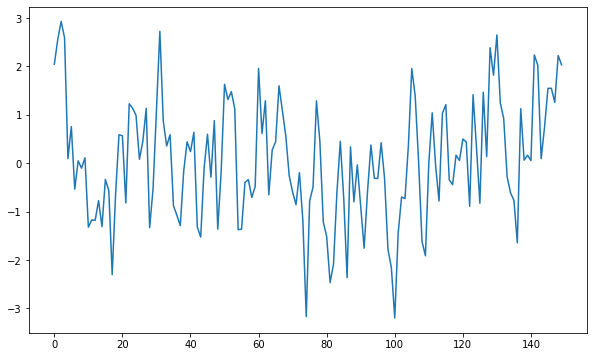

In [154]:
plt.figure(figsize=(10,6))
plt.plot(ts[0:150])

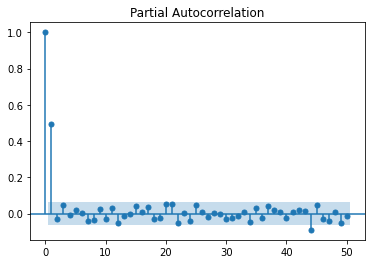

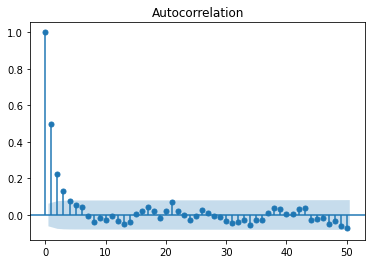

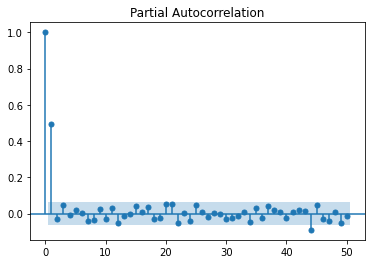

In [155]:
plot_acf(ts,lags=50)
plot_pacf(ts,lags=50)

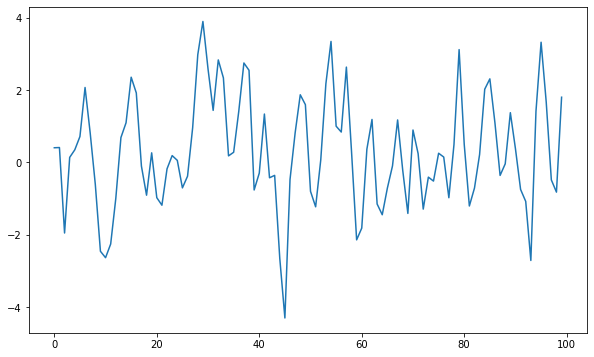

In [180]:
#generate MA(2) TS 

num_periods=1000
#Mean and Std of shocks
mean = 0
std=1
#phi coeff
phi_1=-0.9999
phi_2=-0.
#generate random shocks
shocks_ma = std*np.random.randn(num_periods)+mean
ts_ma = np.zeros(num_periods)
ts_ma[0]=np.random.rand()
ts_ma[1]=np.random.rand()
for i in range(2,len(ts),1):
    ts_ma[i] = shocks_ma[i-1]*phi_1+shocks_ma[i-2]*phi_2+shocks_ma[i]

plt.figure(figsize=(10,6))
plt.plot(ts[0:100])

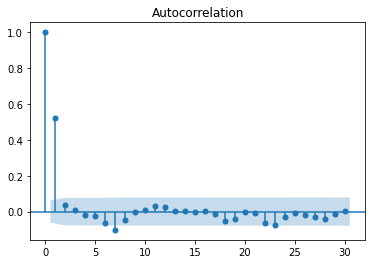

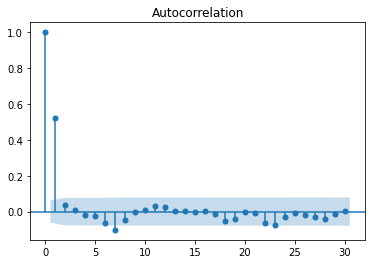

In [172]:
plot_acf(ts_ma)

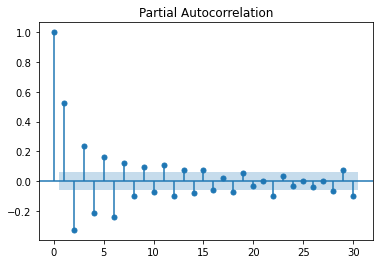

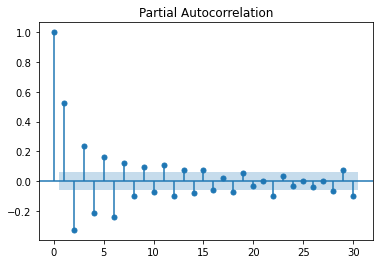

In [173]:
plot_pacf(ts_ma)

In [184]:
?np.random.normal

In [361]:
"""def simulate_ar1(phis=[0.9,0.99,0.99999,1.],nsamples=5,T=100,mean=0,std=1):
    fig, ax = plt.subplots(nrows=len(phis), ncols=1,figsize=(10,10))
    legend=[f'sample_{i}' for i in range(nsamples)]
    mean_dict={phis[j]:[] for j in range(len(phis))}
    std_dict={phis[j]:[] for j in range(len(phis))}
    for i in range(nsamples):
        #generate T shocks for this sample path
        e_t = np.random.normal(loc=mean,scale=std,size=T)
        #For each phi in phis vector, use the same shocks and generate a samplepath
        for j in range(len(phis)):
            ts=np.zeros(T)
            #generate sample path
            for k in range(2,len(ts),1):
                ts[k]=phis[j]*ts[k-1]+e_t[k]
            #plot the path in axes_j for phis[j]
            mean_dict[phis[j]].append(ts.mean())
            std_dict[phis[j]].append(ts.std())
            ax[j].plot(ts,label=legend[i])
            ax[j].title.set_text(f'phi={phis[j]}')
    plt.legend(loc=1)
    plt.show()
    return mean_dict,std_dict"""

# Question 3

\begin{align*}
x_t &= 1.5x_{t-1} - 0.5x_{t-2} + e_t - 0.5e_{t-1} \\
&\Rightarrow (1 - \frac{3}{2}L + \frac{1}{2}L^2)x_t = (1 - \frac{1}{2}L)e_t \\
&\Rightarrow (1 - \frac{1}{2}L)(1 - L)x_t = (1 - \frac{1}{2}L)e_t \\
&\Rightarrow (1 - L)x_t = \left[\frac{(1 - \frac{1}{2}L)}{(1 - \frac{1}{2}L)}\right]e_t \\
\end{align*}


Let $g(L) = \frac{(1 - \frac{1}{2}L)}{(1 - \frac{1}{2}L)}$. 

Then
$g(L) = (1 - \frac{1}{2}L)(1 + \frac{1}{2}L + \frac{1}{2^2}L^2 + \frac{1}{2^3}L^3 + \ldots)$ = $(1 + \frac{1}{2}L - \frac{1}{2}L + \frac{1}{2^2}L^2 - \frac{1}{2^2}L^2 + \frac{1}{2^3}L^3 - \frac{1}{2^3}L^3 + \ldots) = 1$

Thus,
$(1 - L)x_t = 1 \cdot e_t \Rightarrow x_t = x_{t-1} + e_t$

**Hence, $x_t$ is similar to a random walk.**

# Question 4

## Part (a)

\begin{align*}
z_t &= x_t + y_t \\
&\Rightarrow z_t = (\phi x_{t-1} + \phi y_{t-1}) + e_t + w_t \\
&\Rightarrow z_t = \phi(x_{t-1} + y_{t-1}) + e_t + w_t \\
&\Rightarrow z_t = \phi z_{t-1} + e_t + w_t \\
\end{align*}

As $e_t + w_t$ is still a white noise (since it has finite mean, variance, unconditional and conditional expectation is zero, independent with previous shocks $w_{t-1} + e_{t-1}$, and has constant conditional and unconditional variance), we can write

$z_t = \phi z_{t-1} + u_t$ where $u_{t}$ is a white noise, hence $z_{t}$ is AR(1) process


## Part (b)

\begin{align*}
(1-\phi L)x_t &= e_t \\
(1-\psi L)x_t &= w_t \\
\end{align*}

Multiply the first by $(1-\psi L)$ and the second by $(1-\phi L)$, hence, we have

\begin{align*}
(1-\psi L)(1-\phi L)x_t &= (1-\psi L)e_t \\
(1-\phi L)(1-\psi L)x_t &= (1-\phi L)w_t \\
\end{align*}

Adding the two processes above, we get

\begin{align*}
(2-\psi L-\phi L+2\psi\phi L^2)x_t &= (1-\psi L)e_t+(1-\phi L)w_t \\
\end{align*}

$(1-\psi L)e_t$ is a MA(1) process, and $(1-\phi L)w_t$ is another MA(1) process. Hence, by results of the sum of two MA(1) processes (Hamilton ch 4.7), we have 

$(1-\psi L)e_t+(1-\phi L)w_t=MA(\max(1,1))=MA(1)$

Hence the process for $x_t$ becomes 

$(2-\psi L-\phi L+2\psi\phi L^2)x_t = (1-kL)u_t$

For some $k$ and white noise $u_t$. 

**Hence $x_t$ is an AR(2,1) process.**


## Question 6

In [524]:
def generate_AR1(phi,shocks):
    ts=np.zeros(len(shocks))
    for i in range(2,len(ts),1):
        ts[i]=phi*ts[i-1]+shocks[i]
    return ts

def generate_normal_shocks(T,mean=0,std=1):
    #np.random.seed(42)
    return np.random.normal(loc=0,scale=1,size=T)

def simulate_AR1(phis=[0.9,0.99,0.99999,1.],nsamples=5,T=100):
    
    fig,axis = plt.subplots(nrows=len(phis),ncols=1,figsize=(10,10))
    labels = [f'sample_{i}' for i in range(nsamples)]
    
    sampled_points = {f'phi={phis[j]}':np.zeros([nsamples,T]) for j in range(len(phis))}
    
    for i in range(nsamples):
        e_t = generate_normal_shocks(T)
        
        for j in range(len(phis)):
            x_t = generate_AR1(phis[j],e_t)
            
            axis[j].plot(x_t,label=labels[i])
            axis[j].title.set_text(f'phi={phis[j]}')
            sampled_points[f'phi={phis[j]}'][i] = x_t
            
    plt.legend(loc=2)
    plt.show()
    return sampled_points



==== starting simulation for sample size = 100 ====


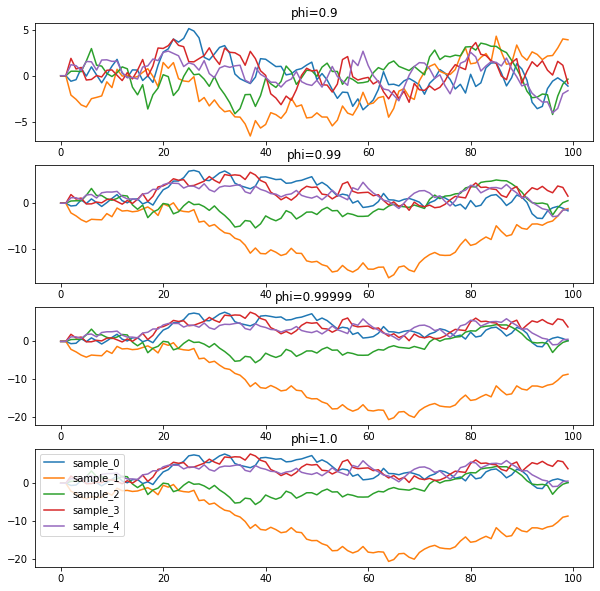

### Summary stats for phi=0.9 ###
Average expected value of x_t = -0.07839377842432929
Average standard deviation of x_t = 1.596685722509556
Theoretical mean = 0
Theoretical std is 2.294157338705618
### Summary stats for phi=0.99 ###
Average expected value of x_t = -0.38313560653468093
Average standard deviation of x_t = 4.0915776842364515
Theoretical mean = 0
Theoretical std is 7.088812050083353
### Summary stats for phi=0.99999 ###
Average expected value of x_t = -0.4103460695868658
Average standard deviation of x_t = 5.648181031975437
Theoretical mean = 0
Theoretical std is 223.60735676962474
### Summary stats for phi=1.0 ###
Average expected value of x_t = -0.41033896007294424
Average standard deviation of x_t = 5.650227559499465
Theoretical mean = 0
Theoretical std is inf


==== starting simulation for sample size = 1000 ====


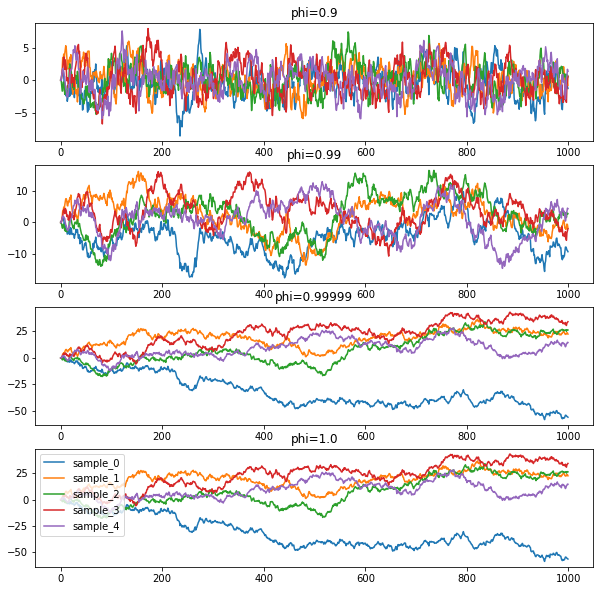

### Summary stats for phi=0.9 ###
Average expected value of x_t = 0.08249400399937155
Average standard deviation of x_t = 1.9262707336227414
Theoretical mean = 0
Theoretical std is 2.294157338705618
### Summary stats for phi=0.99 ###
Average expected value of x_t = 0.9530038931223187
Average standard deviation of x_t = 5.422242592449329
Theoretical mean = 0
Theoretical std is 7.088812050083353
### Summary stats for phi=0.99999 ###
Average expected value of x_t = 5.233933945941881
Average standard deviation of x_t = 20.770444534224946
Theoretical mean = 0
Theoretical std is 223.60735676962474
### Summary stats for phi=1.0 ###
Average expected value of x_t = 5.250398249504195
Average standard deviation of x_t = 20.84332973412406
Theoretical mean = 0
Theoretical std is inf


==== starting simulation for sample size = 10000 ====


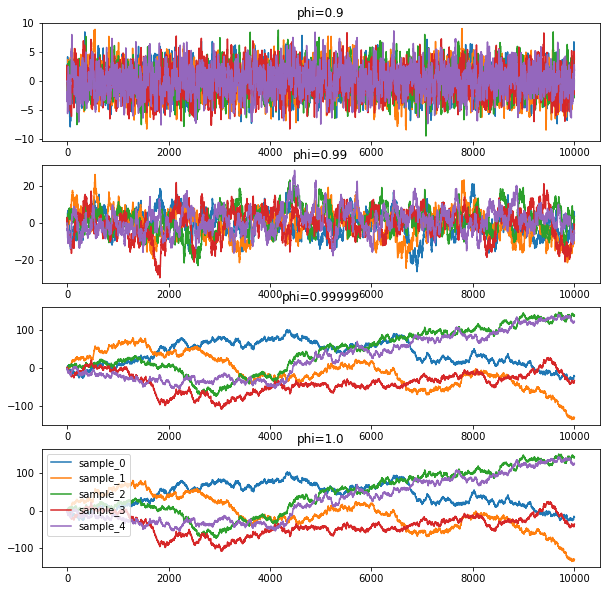

### Summary stats for phi=0.9 ###
Average expected value of x_t = 0.016121416069968655
Average standard deviation of x_t = 1.990169644934588
Theoretical mean = 0
Theoretical std is 2.294157338705618
### Summary stats for phi=0.99 ###
Average expected value of x_t = 0.18941814767978443
Average standard deviation of x_t = 6.071863396174041
Theoretical mean = 0
Theoretical std is 7.088812050083353
### Summary stats for phi=0.99999 ###
Average expected value of x_t = 13.799924900993036
Average standard deviation of x_t = 49.26102876721572
Theoretical mean = 0
Theoretical std is 223.60735676962474
### Summary stats for phi=1.0 ###
Average expected value of x_t = 14.107167523303113
Average standard deviation of x_t = 50.16413737952609
Theoretical mean = 0
Theoretical std is inf


In [525]:
def print_summary_stats(samples):
    import regex as re
    for key,value in samples.items():
        print(f'### Summary stats for {key} ###')
        print(f'Average expected value of x_t = {value.mean(axis=0).mean()}')
        print(f'Average standard deviation of x_t = {value.std(axis=0).mean()}')
        print(f'Theoretical mean = 0')
        phi = (float)(re.findall('[.\d]+',string=key)[0])
        try:
            theo_std = np.sqrt(1/(1-phi**2))
        except:
            theo_std = np.inf
        print(f'Theoretical std is {theo_std}')

Time_periods = [100,1000,10000]
for i,T in enumerate(Time_periods):
    print('\n')
    print(f'==== starting simulation for sample size = {Time_periods[i]} ====')
    sampled_points = simulate_AR1(T=T)
    print_summary_stats(sampled_points)

For Normal Shocks, we have the following observation:

1. Extent of persistence increases as phi increases
2. Observed sample mean is close tp theoretical mean for large sample sizes and small phi
2. Observed sample std is close tp theoretical std for large sample sizes and small phi


## Question  7

In [533]:
def generate_AR1(phi,shocks):
    ts=np.zeros(len(shocks))
    for i in range(2,len(ts),1):
        ts[i]=phi*ts[i-1]+shocks[i]
    return ts

def generate_normal_shocks(T,mean=0,std=1):
    #np.random.seed(42)
    return np.random.standard_cauchy(size=T)

def simulate_AR1(phis=[0.9,0.99,0.99999,1.],nsamples=5,T=100):
    
    fig,axis = plt.subplots(nrows=len(phis),ncols=1,figsize=(10,10))
    labels = [f'sample_{i}' for i in range(nsamples)]
    
    sampled_points = {f'phi={phis[j]}':np.zeros([nsamples,T]) for j in range(len(phis))}
    
    for i in range(nsamples):
        e_t = generate_normal_shocks(T)
        
        for j in range(len(phis)):
            x_t = generate_AR1(phis[j],e_t)
            
            axis[j].plot(x_t,label=labels[i])
            axis[j].title.set_text(f'phi={phis[j]}')
            sampled_points[f'phi={phis[j]}'][i] = x_t
            
    plt.legend(loc=2)
    plt.show()
    return sampled_points



==== starting simulation for sample size = 100 ====


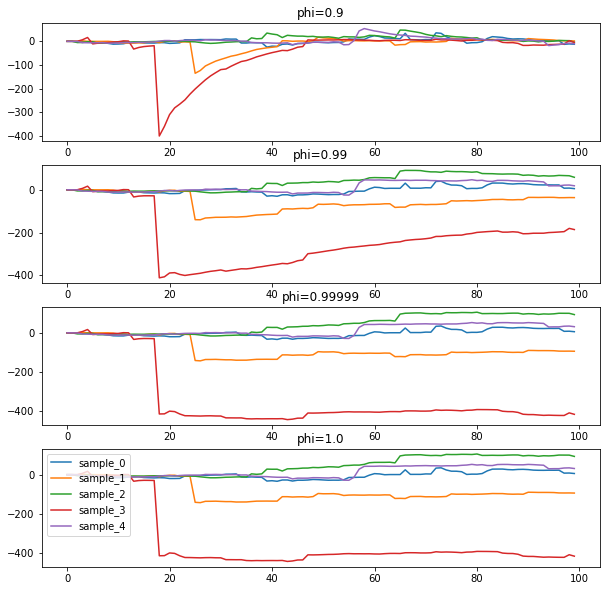

### Summary stats for phi=0.9 ###
Average expected value of x_t = -7.044816502191496
Average standard deviation of x_t = 22.90765994641635
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99 ###
Average expected value of x_t = -48.06028389446777
Average standard deviation of x_t = 98.49898057165048
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99999 ###
Average expected value of x_t = -73.83957120346378
Average standard deviation of x_t = 141.13639000446582
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=1.0 ###
Average expected value of x_t = -73.87323965461604
Average standard deviation of x_t = 141.1910769236175
Theoretical mean = 0
Theoretical std is inf


==== starting simulation for sample size = 1000 ====


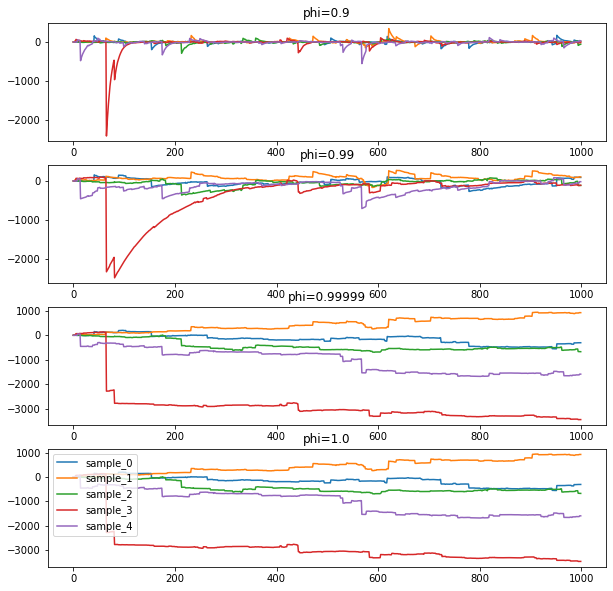

### Summary stats for phi=0.9 ###
Average expected value of x_t = -10.192104967812448
Average standard deviation of x_t = 37.84031149303451
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99 ###
Average expected value of x_t = -101.14177572350388
Average standard deviation of x_t = 187.09603092429066
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99999 ###
Average expected value of x_t = -807.3537275399015
Average standard deviation of x_t = 1151.4452021455159
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=1.0 ###
Average expected value of x_t = -810.7941565518884
Average standard deviation of x_t = 1156.3458982487532
Theoretical mean = 0
Theoretical std is inf


==== starting simulation for sample size = 10000 ====


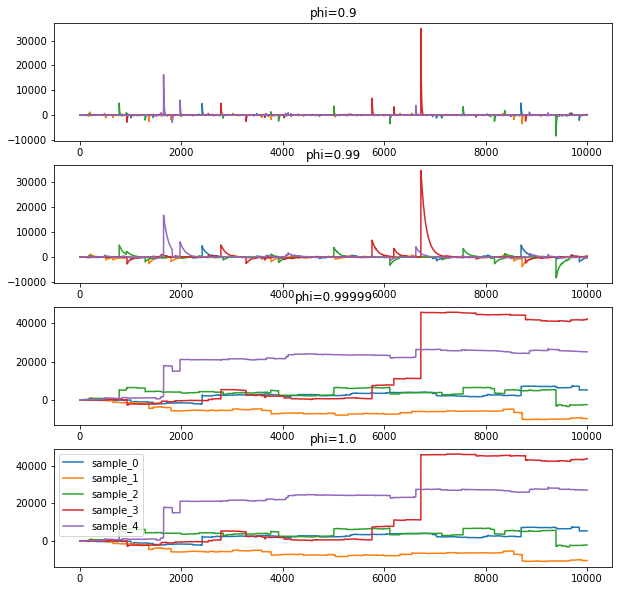

### Summary stats for phi=0.9 ###
Average expected value of x_t = 12.75331811358225
Average standard deviation of x_t = 90.101929267895
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99 ###
Average expected value of x_t = 127.80074769479126
Average standard deviation of x_t = 586.8039833188407
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=0.99999 ###
Average expected value of x_t = 7068.9369968533365
Average standard deviation of x_t = 11167.469123044053
Theoretical mean = 0
Theoretical std is inf
### Summary stats for phi=1.0 ###
Average expected value of x_t = 7286.388945240173
Average standard deviation of x_t = 11462.53935557342
Theoretical mean = 0
Theoretical std is inf


In [535]:
def print_summary_stats(samples):
    import regex as re
    for key,value in samples.items():
        print(f'### Summary stats for {key} ###')
        print(f'Average expected value of x_t = {value.mean(axis=0).mean()}')
        print(f'Average standard deviation of x_t = {value.std(axis=0).mean()}')
        print(f'Theoretical mean = 0')
        phi = (float)(re.findall('[.\d]+',string=key)[0])
        print(f'Theoretical std is {np.inf}')

Time_periods = [100,1000,10000]
for i,T in enumerate(Time_periods):
    print('\n')
    print(f'==== starting simulation for sample size = {Time_periods[i]} ====')
    sampled_points = simulate_AR1(T=T)
    print_summary_stats(sampled_points)

For Cauchy Shocks, we have the following observation:

1. Cauchy distribution has infinite mean & variance, hence it is not a white noise
2. Consequently, the means of x_t is not defined and we see that they vary wildly across samples
2. Theoretical standard dev of x_t is close to infinity, and we observe rapid spikes in TS-plot which sometimes quickly drops back to low values


# Question 8

In [569]:
import pandas_datareader.data as web
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

symbol_1 = 'MULTPL/SP500_DIV_YIELD_MONTH'
symbol_2 = 'MULTPL/SP500_DIV_YIELD_YEAR'
import datetime as dt

div_yield_month = web.DataReader(symbol_1, 'quandl', 
                               start='1881-01-01', 
                               end=dt.date.today(), 
                               api_key='zAT3Vu_VzCH8xg2NjoxY')

div_yield_year = web.DataReader(symbol_2, 'quandl', 
                               start='1881-01-01', 
                               end=dt.date.today(), 
                               api_key='zAT3Vu_VzCH8xg2NjoxY')

In [570]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
div_yield_month.head(100)

,Value
Date,
2023-12-31,1.51
2023-12-01,1.51
2023-11-30,1.55
2023-11-01,1.62
2023-10-31,1.62
2023-09-30,1.57
2023-09-01,1.52
2023-08-31,1.55
2023-08-01,1.50


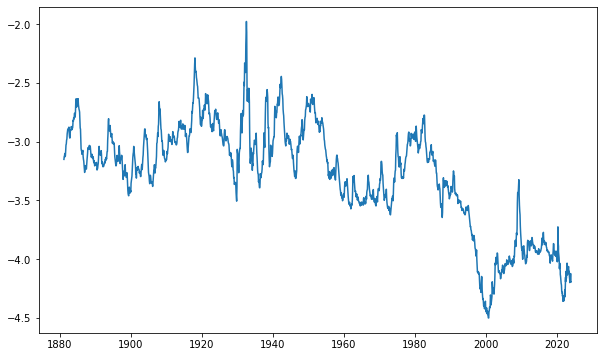

In [571]:
plt.figure(figsize=(10,6))
plt.plot(np.log(div_yield_month/100))

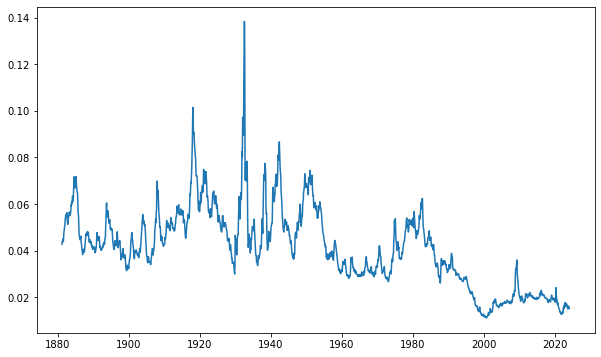

In [573]:
plt.figure(figsize=(10,6))
plt.plot(div_yield_month/100)

In [579]:
(div_yield_month/100).min()

Value    0.0111
dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

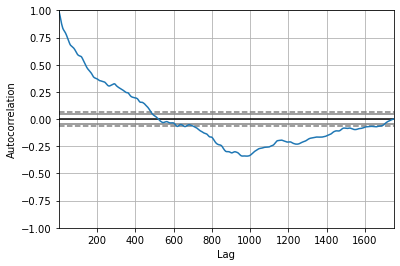

In [572]:
pd.plotting.autocorrelation_plot(np.log(div_yield_month/100))